In [42]:
import pandas as pd
import numpy as np

In [43]:
df=pd.read_csv("C://Users/Meenakshi/Downloads/ML/diabetes - diabetes.csv")

In [44]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [45]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [46]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [47]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [48]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
s=SMOTE()
x_sampled,y_sampled=s.fit_resample(x,y)

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sampled,y_sampled,test_size=0.25,random_state=42)

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [53]:
import tensorflow.keras as tk

In [106]:
model=tk.Sequential(
    [
        tk.Input(shape=(8,)),
        tk.layers.Dense(units=8,activation="relu",kernel_initializer="he_uniform"),
        tk.layers.Dense(units=5,activation="relu",kernel_initializer="he_uniform"),
        tk.layers.Dense(units=1,activation="sigmoid",kernel_initializer="he_uniform"),
    ]
)

In [109]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [112]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 5)                   │              45 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123 (492.00 B)

 Trainable params: 123 (492.00 B)

 Non-trainable params: 0 (0.00 B)

In [122]:
history=model.fit(
    x_train_scaled,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test,y_test)
)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7112 - loss: 0.5506 - val_accuracy: 0.5040 - val_loss: 127.2273
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7106 - loss: 0.5567 - val_accuracy: 0.5040 - val_loss: 128.5024
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7496 - loss: 0.5271 - val_accuracy: 0.5040 - val_loss: 129.6917
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7323 - loss: 0.5336 - val_accuracy: 0.5040 - val_loss: 132.9179
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7215 - loss: 0.5394 - val_accuracy: 0.5040 - val_loss: 134.0373
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7500 - loss: 0.5174 - val_accuracy: 0.5040 - val_loss: 134.0946
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7472 - loss: 0.5252 - val_accuracy: 0.5040 - val_loss: 135.2274
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7344 - loss: 0.5260 - val_accuracy: 0.50

In [123]:
score=model.evaluate(x_test_scaled,y_test,verbose=0)

print("Accuracy is ",score[1])

Accuracy is  0.7279999852180481


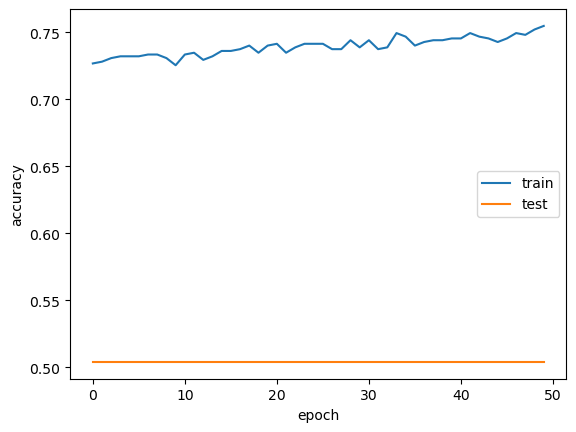

In [130]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'])